In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'fiducial_tng100B_099S_0A_800R/results/'
hisubfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hiptlfile = pkl.load(open(path + 'hiptlXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
vnfile = pkl.load(open(path + 'vnXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

flib_og = FigureLibrary()
flib_og.addResults(hisubfile)
flib_og.addResults(vnfile)
flib_og.addResults(hiptlfile)

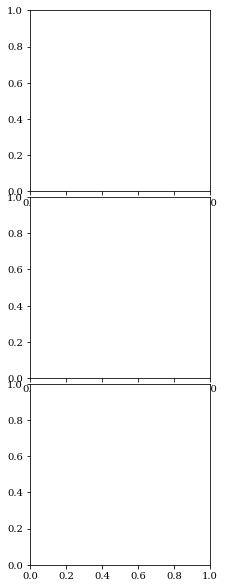

In [41]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 1, panel_length = 2.5)
fig, panels = flib.getFig()
dim = flib.getDim()
ip = {}
ip['is_particle'] = True
ip['color'] = ['red', 'blue']
ip['color_cut'] = '0.60'
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
flib.arrangeResults(ip, 'space', ['real', 'redshift', ''], 'snapshot', [99], 'color');

In [42]:
labels = {'red':'HI-Red Cross-Power', 'blue':'HI-Blue Cross-Power'}
facecolors = ['gray', 'tan']
for idx in [(0,0),(1,0)]:
    for c in ['blue', 'red']:
        fkw = {}
        fkw['color'] = c
        fkw['label'] = labels[c]
        flib.plotFill(idx, {'color':c}, fill_kwargs = fkw)
    panels[idx].set_facecolor(mpl.colors.to_rgba(facecolors[idx[0]], 0.3))

In [43]:
for idx in [(0,0),(1,0)]:
    results = flib.figarr[idx]
    blues = flib.getMatchingResults({'color':'blue'}, {}, rcs = results)
    reds = flib.getMatchingResults({'color':'red'}, {}, rcs = results)
    flib.addColorRatios((2,0), reds, blues)
        
    

['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']


In [44]:
idx = (2,0)
ip = {}
ip['space'] = 'real'
fkw = {}
fkw['alpha'] = 0.55
fkw['color'] = 'gray'
fkw['label'] = 'Real Space'
flib.plotFill(idx, ip, fill_kwargs = fkw)
ip['space'] = 'redshift'
fkw['color'] = 'tan'
fkw['label'] = 'Redshift Space'
flib.plotFill(idx, ip, fill_kwargs = fkw)
p = panels[idx]
xlim = p.get_xlim()
p.plot(xlim, [1,1], linestyle = '--', color = 'black')

In [45]:
ratio_panel = [idx]
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panel)
flib.matchAxisLimits(panel_exceptions = ratio_panel)
p = panels[idx]
ylim = p.get_ylim()
p.set_ylim(ylim[0] - 0.2, ylim[1] + 0.2)
# ticks
tickkwargs = {'labelsize':10}
# flib.removeYTickLabels(panel_exceptions = ratio_panel + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)

#labels
lkw = {}
lkw['loc'] = 'upper right'
lkw['fontsize'] = 10
flib.addLegend((0,0), lkw)
flib.addLegend(idx, lkw)
txtkw = {'fontsize':12}
flib.rowLabels(['Real Space', 'Redshift Space', 'Color Ratio'], txt_kwargs = txtkw)
pos = [flib.xborder[0]/2/flib.figsize[0], 1 - (flib.panel_length + flib.panel_bt[0] + flib.yborder[1])/flib.figsize[1]]
txtkw['fontsize'] = 12
txtkw['ha'] = 'center'
flib.axisLabel('y', subscript = r'\rm{HI-gal}', pos = pos, txt_kwargs = txtkw)
flib.labelPanelAxis(idx, 'y', r'P$_{\rm{red}}$ (k)/P$_{\rm{blue}}$ (k)', txt_kwargs = txtkw)
txtkw['rotation'] = 'horizontal'
flib.axisLabel('x', txt_kwargs = txtkw)

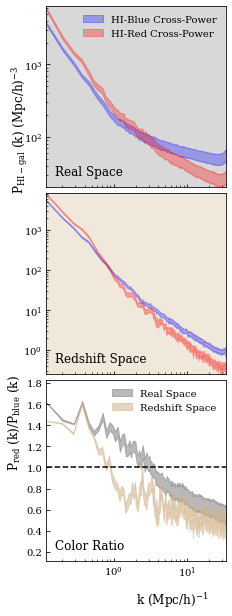

In [46]:
fig